In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

# специально написанная функция для построения гистограмм для категориальных признаков
def plot_column_hist(tbl, col_name = 'subject_norm', rotation_angle = 90, num_elements = 20):
    x = np.arange(tbl.shape[0])
    plt.figure(figsize = (10, 6))
    plt.bar(x, tbl.qty)
    plt.xticks(x, tbl[col_name], rotation = rotation_angle)
    plt.show()

#установим отображение графиков на лету (иначе не будет отрисовки)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Загрузим данные по топ 10000 фильмов с сайта IMDB.
Выведем размер данных (количество строк и столбцов), и выведем первые пару строк, чтобы получить приблизительное представление о данных.

In [2]:
names = ['imdbID', 'title', 'year', 'score', 'votes', 'runtime', 'genres']
data = pd.read_csv('imdb_top_10000.txt', delimiter='\t', names=names).dropna()
print(data.shape)
data.head(2)

(9999, 7)


,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller


### Длительность фильма приведем в численный вид.

In [3]:
data.runtime = data.runtime.apply(lambda x: int(x.split(' ')[0]))

In [4]:
data.head(2)

,imdbID,title,year,score,votes,runtime,genres
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142,Crime|Drama
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154,Crime|Thriller


### Выделим уникальные жанры.

In [5]:
#выделим уникальные жанры
genres = set()
for m in data.genres:
    genres.update(g for g in m.split('|'))
genres = sorted(genres)

#создадим булевые признаки для каждого жанра
for genre in genres:
    data[genre] = [genre in movie.split('|') for movie in data.genres]
         
data.head(2)

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142,Crime|Drama,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction (1994),1994,9.0,490065,154,Crime|Thriller,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


### Уберем год из названия фильма.

In [6]:
data.title = data.title.apply(lambda x: x[:-7])
data.head(2)

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0111161,The Shawshank Redemption,1994,9.2,619479,142,Crime|Drama,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,tt0110912,Pulp Fiction,1994,9.0,490065,154,Crime|Thriller,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


### Теперь взглянем на описания для числовых столбцов.

In [7]:
data[['score', 'runtime', 'year', 'votes']].describe()

,score,runtime,year,votes
count,9999.000000,9999.000000,9999.000000,9999.000000
mean,6.385989,103.580358,1993.471447,16605.462946
std,1.189965,26.629310,14.830049,34564.883945
min,1.500000,0.000000,1950.000000,1356.000000
25%,5.700000,93.000000,1986.000000,2334.500000
50%,6.600000,102.000000,1998.000000,4981.000000
75%,7.200000,115.000000,2005.000000,15278.500000
max,9.200000,450.000000,2011.000000,619479.000000


Имеем следующие описательные характеристики:   
count - количество непустных значений в данных, видно что все поля заполнены;   
mean - среднее значение (6.38 - средняя оценка, 103 минуты - средняя продолжительность фильма и тд);   
std - среднеквадратичное отклонение (корень из среднего квадратов отклонений значений от среднего), иными словами мера разброса;   
min, max - минимальное и максимальное значения (тут обратим внимание что есть фильмы с нулевой длительностью);   
3 перцентиля: перцентиль это значение в пределах которого лежит соответствующий процент значений распределения. 

In [8]:
print('количество фильмов с нулевой длительностью', len(data[data.runtime == 0]))

#Сразу пометим длительность этих фильмов как плохие данные.
data.runtime[data.runtime==0] = np.nan

количество фильмов с нулевой длительностью 282


/home/nikita/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Еще раз взглянем на описание распределения длительности фильмов.

In [9]:
data.runtime.describe()

count    9717.000000
mean      106.586395
std        20.230330
min        45.000000
25%        93.000000
50%       103.000000
75%       115.000000
max       450.000000
Name: runtime, dtype: float64

### Взглянем на визуализацию распределений, чтобы было легче воспринимать происходящее.
Начнем с гистограммы, она показывает сколько значения попадают в какой диапазон.   
Год выхода - целочисленный показатель, соответственно если явно перечислить все годы с 1950 по 2011 (np.arange(1950, 2012)), то на гистограмме мы увидим, сколько фильмов выходило каждый год.

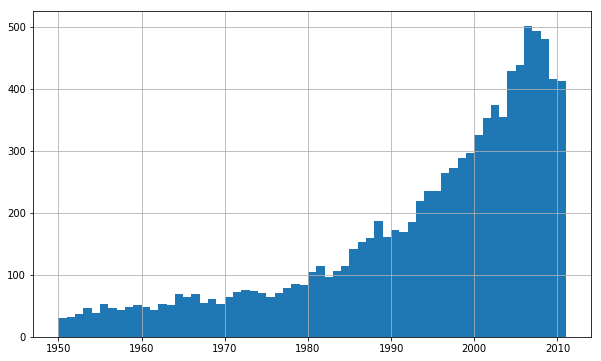

In [10]:
data.year.hist(bins = np.arange(1950, 2012), figsize = (10, 6))

Если указать целое число для параметра bins, то весь диапазон разбивается равномерно на указанное количество равных частей.

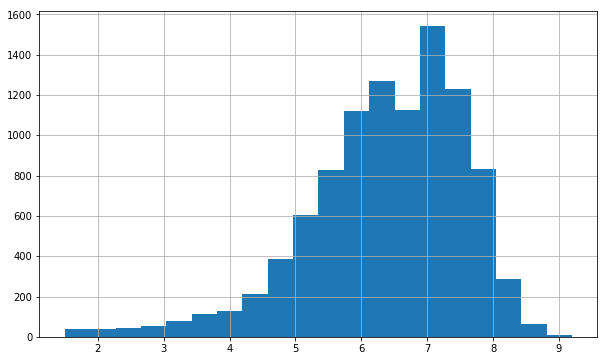

In [11]:
data.score.hist(bins = 20, figsize = (10, 6))

Можно уже сделать несколько выводов: со временем количество выходящих фильмов увеличивается, и оценка большинства относительно невысока (50-перцентиль или медиана равна 6.6, то есть половина фильмов имеет рейтинг ниже 6.6).   
Посмотрим на совместное распределение года выхода и оценки.

Text(0,0.5,'IMDB Rating')

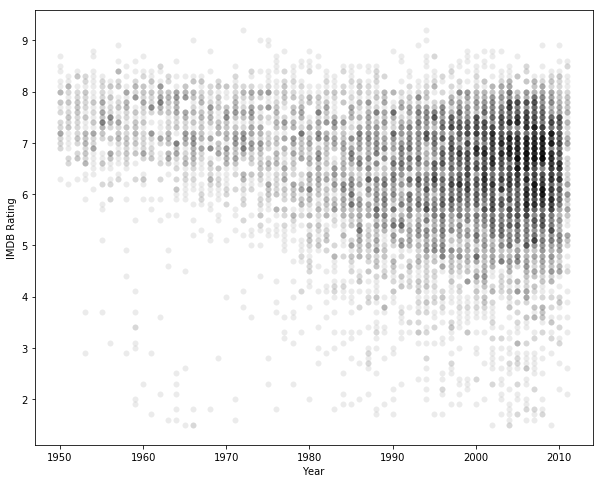

In [12]:
plt.figure(figsize = (10,8))
plt.scatter(data.year, data.score, lw=0, alpha=.08, color='k')
plt.xlabel("Year")
plt.ylabel("IMDB Rating")

### Теперь посмотрим на распределение фильмов по жанрам.

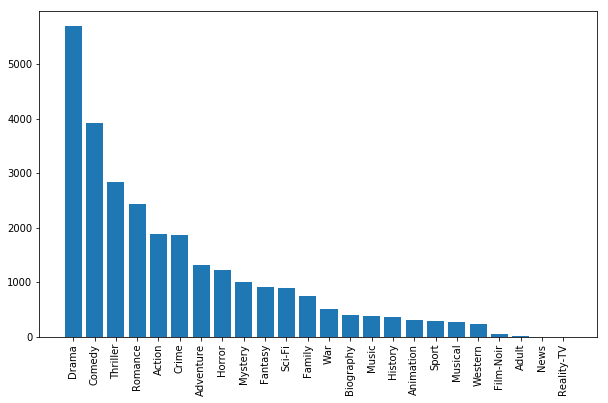

In [13]:
tbl = data.iloc[:, 7:].sum().reset_index().rename(columns={'index': 'genres', 0: 'qty'}, 
                                                  index=str).sort_values(by = 'qty', ascending = False)
plot_column_hist(tbl, col_name = 'genres', rotation_angle = 90, num_elements = 20)

In [14]:
data[data['Reality-TV']==True]

,imdbID,title,year,score,votes,runtime,genres,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
9713,tt0138987,20 Dates,1998,5.0,1429,87.0,Biography|Comedy|Reality-TV|Romance,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False


Можно сделать выводы о том, какие жанры самые популярные.   
А теперь давайте для каждого жанра посмотрим распределение оценок.

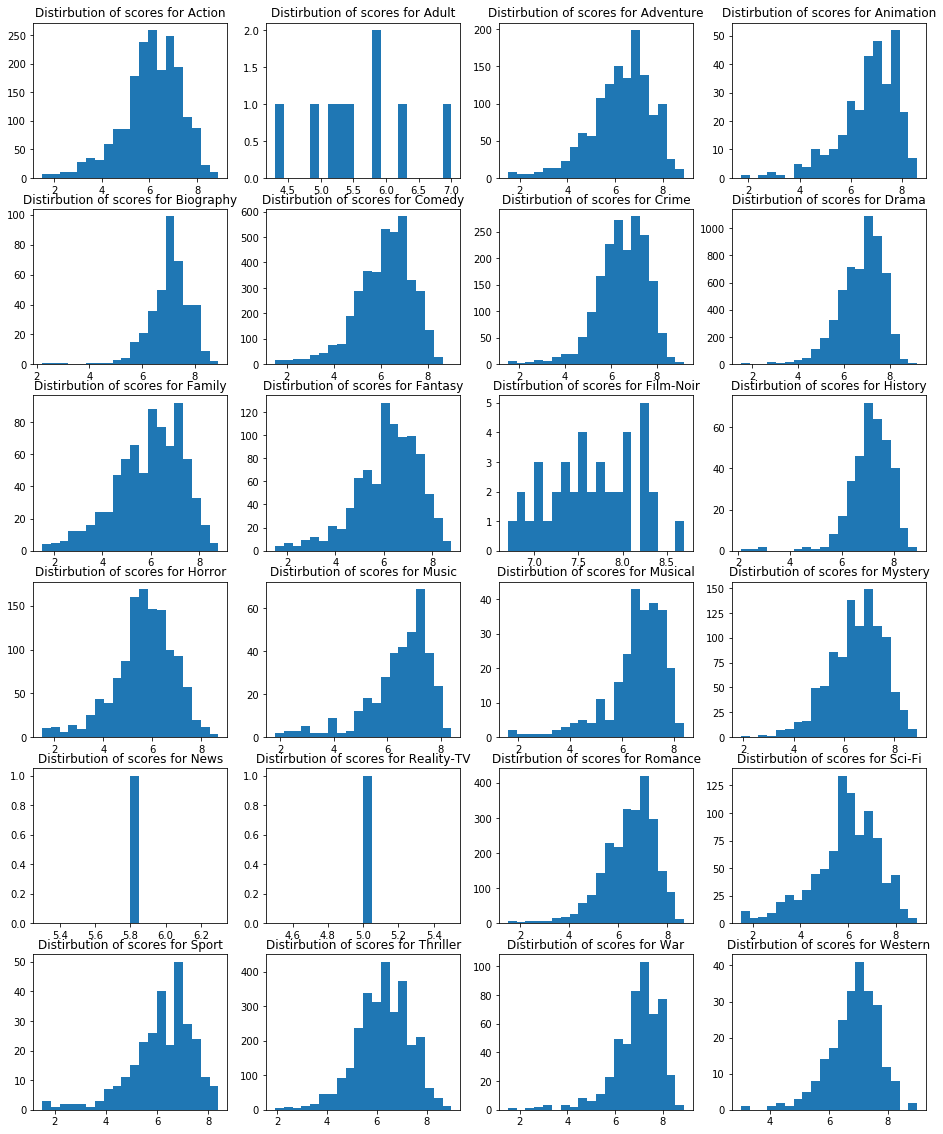

In [15]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize = (16,20))
for i in range(len(genres)):
    axes.flatten()[i].hist(data[data[genres[i]]].score, bins = 20)
    axes.flatten()[i].set_title('Distirbution of scores for '+genres[i])

### Выводы:
1.   
2.   

### Перейдем к следующему датасету.

In [16]:
df=pd.read_csv("olive.csv")
df.rename(columns={df.columns[0]:'region',df.columns[1]:'area'}, inplace=True)
df.head(2)

,region,area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
0,South,North Apulia,1075,75,226,7823,672,36,60,29
1,South,North Apulia,1088,73,224,7709,781,31,61,29


Этот набор данных содержит 8 характеристик (уровни кислот в оливках), распределённых по 9 классам, которые представляют собой регионы Италии, где их собрали. Цель проводимого анализа состоит в том, чтобы найти способы определения происхождения оливок. Эта задача появилась исходя из практического интереса, потому что оливковое масло из некоторых районов ценится выше, чем из других.   
Представлено 572 измерения Для каждого объекта задано 10 свойств.

In [17]:
df.shape

(572, 10)

### Посмотрим на количество измерений по регионам.

In [18]:
pd.crosstab(df.area, df.region)

region,North,Sardinia,South
area,,,
Calabria,0,0,56
Coastal Sardinia,0,33,0
East Liguria,50,0,0
Inland Sardinia,0,65,0
North Apulia,0,0,25
Sicily,0,0,36
South Apulia,0,0,206
Umbria,51,0,0
West Liguria,50,0,0


### Посмотрим на параметры каждого из распределений кислотностей и на матрица корреляций.

In [19]:
df.iloc[:,2:].describe()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,1231.741259,126.094406,228.865385,7311.748252,980.527972,31.888112,58.097902,16.281469
std,168.592264,52.494365,36.744935,405.810222,242.799221,12.968697,22.030250,14.083295
min,610.000000,15.000000,152.000000,6300.000000,448.000000,0.000000,0.000000,1.000000
25%,1095.000000,87.750000,205.000000,7000.000000,770.750000,26.000000,50.000000,2.000000
50%,1201.000000,110.000000,223.000000,7302.500000,1030.000000,33.000000,61.000000,17.000000
75%,1360.000000,169.250000,249.000000,7680.000000,1180.750000,40.250000,70.000000,28.000000
max,1753.000000,280.000000,375.000000,8410.000000,1470.000000,74.000000,105.000000,58.000000


In [20]:
df.iloc[:,2:].corr()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
palmitic,1.000000,0.835605,-0.170392,-0.837335,0.460684,0.319327,0.228299,0.501952
palmitoleic,0.835605,1.000000,-0.222185,-0.852438,0.621627,0.093112,0.085481,0.416350
stearic,-0.170392,-0.222185,1.000000,0.113599,-0.197817,0.018917,-0.040979,0.140377
oleic,-0.837335,-0.852438,0.113599,1.000000,-0.850318,-0.218171,-0.319962,-0.424146
linoleic,0.460684,0.621627,-0.197817,-0.850318,1.000000,-0.057439,0.210973,0.089045
linolenic,0.319327,0.093112,0.018917,-0.218171,-0.057439,1.000000,0.620236,0.578319
arachidic,0.228299,0.085481,-0.040979,-0.319962,0.210973,0.620236,1.000000,0.328663
eicosenoic,0.501952,0.416350,0.140377,-0.424146,0.089045,0.578319,0.328663,1.000000


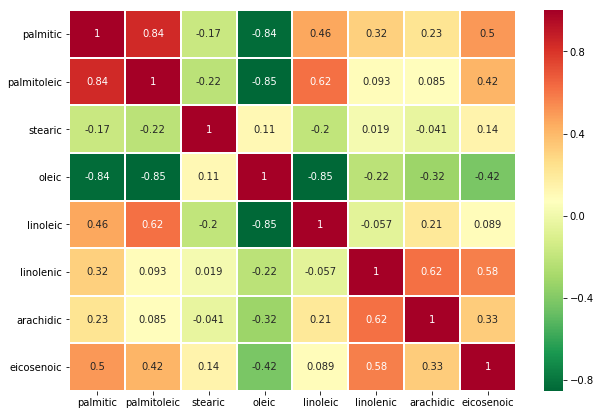

In [21]:
sns.heatmap(df.iloc[:,2:].corr(), figsize (10, 7), cmap='RdYlGn_r', linewidths=1, annot=True)

Text(0,0.5,'linolenic')

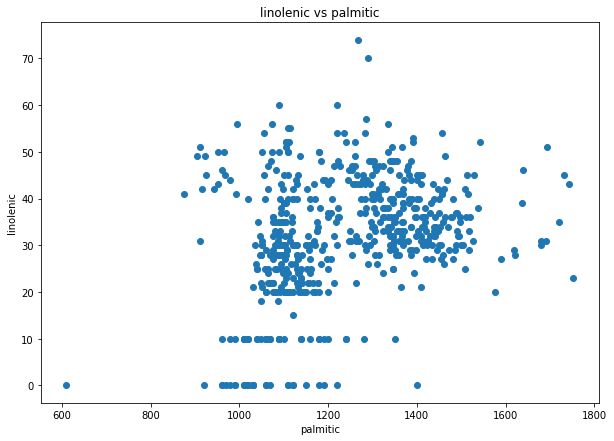

In [22]:
fig=plt.figure()
plt.scatter(df.palmitic, df.linolenic)
axis = fig.gca() #get current axis
axis.set_title('linolenic vs palmitic')
axis.set_xlabel('palmitic')
axis.set_ylabel('linolenic')
#ax can be got with fig.gca()

In [23]:
df.groupby('region').describe().T

region                   North     Sardinia        South
arachidic   count   151.000000    98.000000   323.000000
            mean     37.576159    73.173469    63.117647
            std      29.358573    11.882609    11.164430
            min       0.000000    45.000000    32.000000
            25%      10.000000    66.000000    56.000000
            50%      38.000000    72.000000    62.000000
            75%      59.500000    81.000000    69.000000
            max     100.000000   105.000000   102.000000
eicosenoic  count   151.000000    98.000000   323.000000
            mean      1.973510     1.938776    27.321981
            std       0.729813     0.743582     8.391528
            min       1.000000     1.000000    10.000000
            25%       1.000000     1.000000    22.000000
            50%       2.000000     2.000000    27.000000
            75%       2.500000     2.000000    32.000000
            max       3.000000     3.000000    58.000000
linoleic    count   151.000000    98.000000   323.000000
            mean    727.033113  1196.530612  1033.498452
            std     143.122578   107.233554   210.673018
            min     510.000000  1057.000000   448.000000
            25%     602.000000  1112.250000   855.500000
            50%     680.000000  1146.500000  1090.000000
            75%     825.000000  1306.500000  1202.500000
            max    1050.000000  1470.000000  1462.000000
linolenic   count   151.000000    98.000000   323.000000
            mean     21.788079    27.091837    38.065015
            std      16.886527     5.384374     7.972709
            min       0.000000    15.000000    20.000000
            25%      10.000000    23.000000    32.000000
            50%      20.000000    27.000000    37.000000
            75%      35.000000    30.000000    44.000000
            max      70.000000    43.000000    74.000000
oleic       count   151.000000    98.000000   323.000000
            mean   7793.052980  7268.020408  7100.009288
            std     164.815525   141.878268   345.143066
            min    7340.000000  6882.000000  6300.000000
            25%    7680.000000  7137.250000  6883.000000
            50%    7800.000000  7325.500000  7030.000000
            75%    7950.000000  7381.000000  7283.500000
            max    8410.000000  7439.000000  8113.000000
palmitic    count   151.000000    98.000000   323.000000
            mean   1094.801325  1111.346939  1332.287926
            std      82.563513    40.411059   152.934872
            min     610.000000  1030.000000   875.000000
            25%    1060.000000  1085.250000  1268.000000
            50%    1090.000000  1107.500000  1346.000000
            75%    1125.000000  1137.250000  1419.000000
            max    1400.000000  1213.000000  1753.000000
palmitoleic count   151.000000    98.000000   323.000000
            mean     83.735099    96.744898   154.801858
            std      26.438785    13.851429    50.723686
            min      15.000000    35.000000    35.000000
            25%      69.000000    88.250000   121.500000
            50%      80.000000    96.000000   163.000000
            75%     100.000000   104.000000   185.000000
            max     180.000000   135.000000   280.000000
stearic     count   151.000000    98.000000   323.000000
            mean    230.801325   226.183673   228.773994
            std      38.956047    17.636272    39.870851
            min     170.000000   199.000000   152.000000
            25%     200.000000   212.000000   201.500000
            50%     230.000000   222.000000   223.000000
            75%     250.000000   239.500000   249.500000
            max     350.000000   272.000000   375.000000

In [24]:
df.groupby('region').aggregate(np.mean)

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,
North,1094.801325,83.735099,230.801325,7793.052980,727.033113,21.788079,37.576159,1.973510
Sardinia,1111.346939,96.744898,226.183673,7268.020408,1196.530612,27.091837,73.173469,1.938776
South,1332.287926,154.801858,228.773994,7100.009288,1033.498452,38.065015,63.117647,27.321981


In [25]:
df.groupby('region').mean()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,
North,1094.801325,83.735099,230.801325,7793.052980,727.033113,21.788079,37.576159,1.973510
Sardinia,1111.346939,96.744898,226.183673,7268.020408,1196.530612,27.091837,73.173469,1.938776
South,1332.287926,154.801858,228.773994,7100.009288,1033.498452,38.065015,63.117647,27.321981


In [26]:
df.groupby('region').std()

,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic
region,,,,,,,,
North,82.563513,26.438785,38.956047,164.815525,143.122578,16.886527,29.358573,0.729813
Sardinia,40.411059,13.851429,17.636272,141.878268,107.233554,5.384374,11.882609,0.743582
South,152.934872,50.723686,39.870851,345.143066,210.673018,7.972709,11.164430,8.391528


### Посмотрим совместное попарное распределение кислотностей в зависимости от региона.

/home/nikita/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


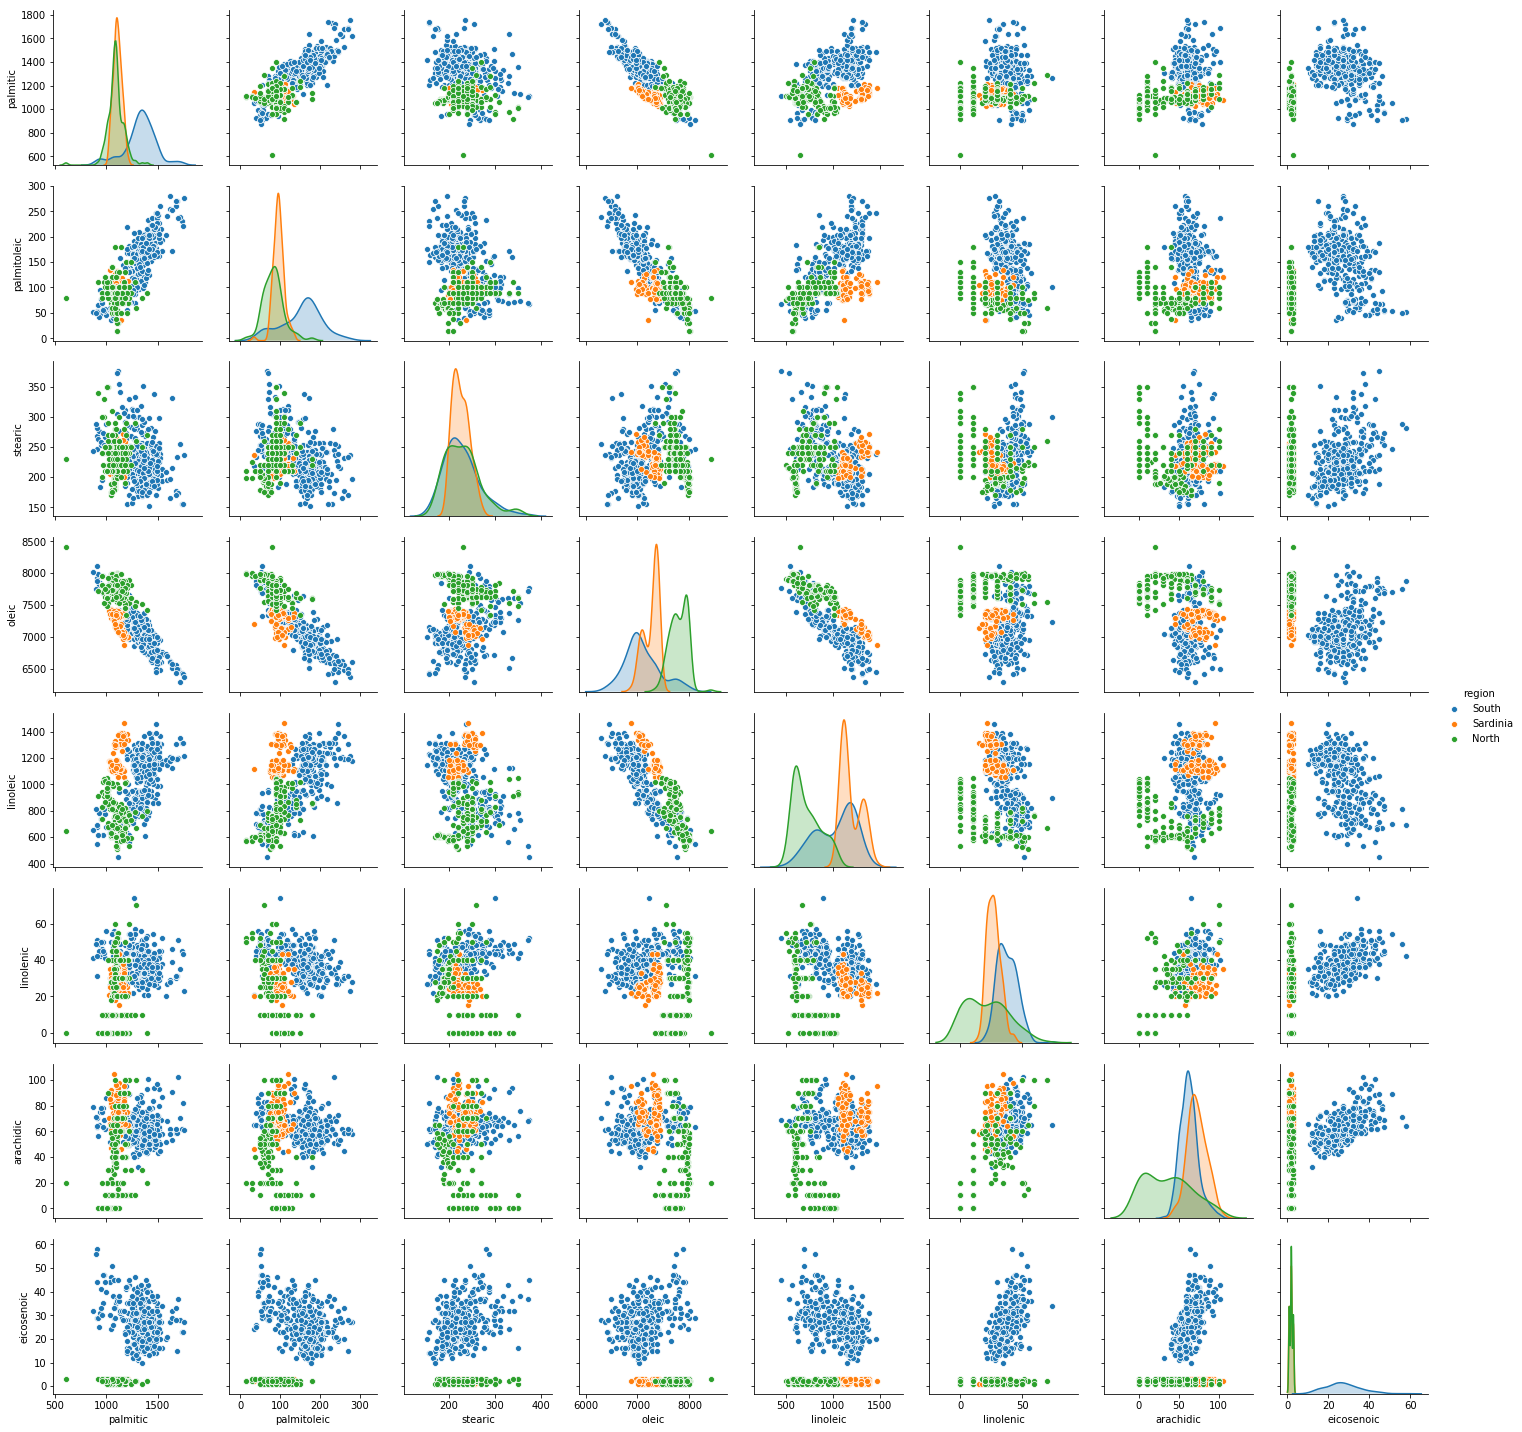

In [27]:
sns.pairplot(df, hue="region")

По каким признакам можно разделить объекты по регионам?   
Аналогично найдите ответ для региона Сардиния по областям?

/home/nikita/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


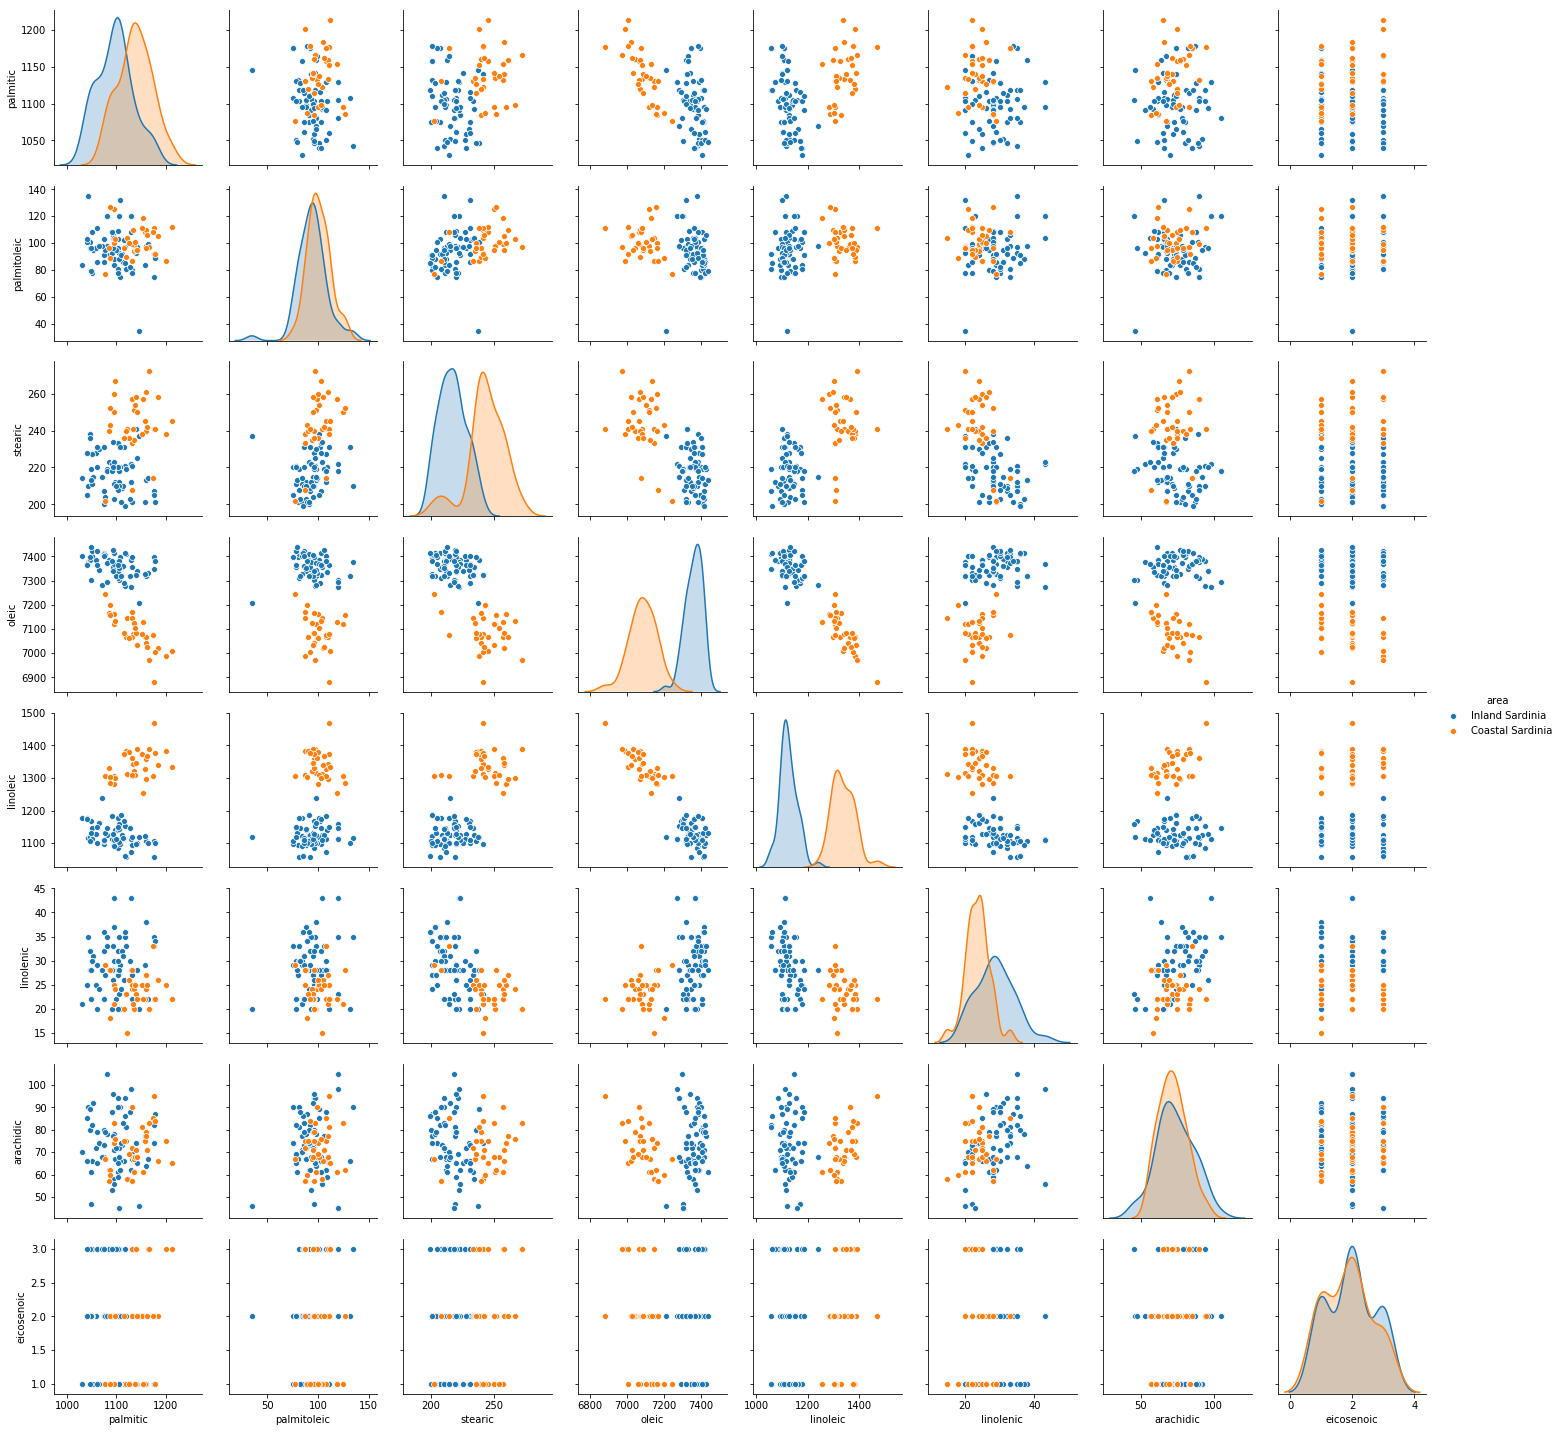

In [28]:
sns.pairplot(df[df.region == 'Sardinia'], hue="area")